In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, classification_report, confusion_matrix

In [12]:
# ===============================
# 1. 加载保存的 PCA 和 LDA 特征数据
# ===============================
pca_data = np.load('pca_features.npz')
X_train_pca = pca_data['X_train_pca']
X_test_pca = pca_data['X_test_pca']
y_train_reg = pca_data['y_train_reg']
y_test_reg = pca_data['y_test_reg']

lda_data = np.load('lda_features.npz')
X_train_lda = lda_data['X_train_lda']
X_test_lda = lda_data['X_test_lda']
y_train_cls = lda_data['y_train_cls']
y_test_cls = lda_data['y_test_cls']

Regression Results (PCA):
MSE: 255.01, MAE: 4.87, R²: 0.25


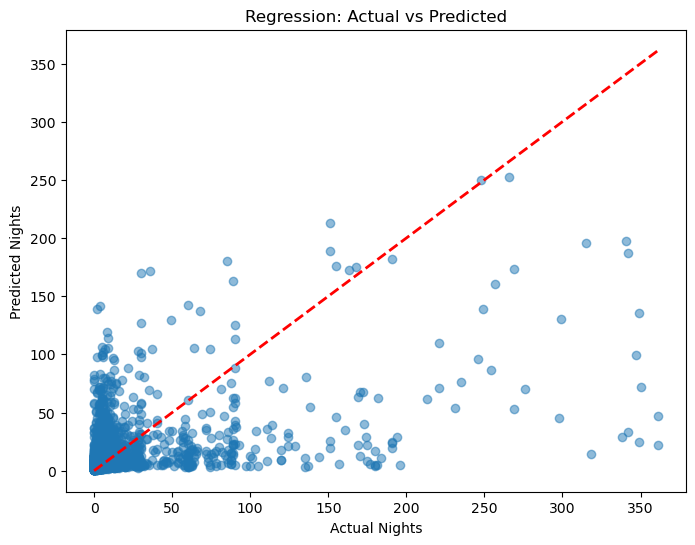

In [13]:
# ===============================
# 2. 回归任务：PCA + RandomForest
# ===============================
rf_reg = RandomForestRegressor(random_state=42)
param_grid_reg = {
    'n_estimators': [50],
    'max_depth':  [20],
    'min_samples_split': [2]
}
tscv = TimeSeriesSplit(n_splits=5)
grid_search_reg = GridSearchCV(rf_reg, param_grid_reg, cv=tscv, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search_reg.fit(X_train_pca, y_train_reg)
best_model_reg = grid_search_reg.best_estimator_
y_pred_reg = best_model_reg.predict(X_test_pca)

# 回归评估
mse = mean_squared_error(y_test_reg, y_pred_reg)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)
print("Regression Results (PCA):")
print(f"MSE: {mse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")

# 可视化
plt.figure(figsize=(8, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
plt.xlabel('Actual Nights')
plt.ylabel('Predicted Nights')
plt.title('Regression: Actual vs Predicted')
plt.show()


Classification Results (LDA):
Accuracy: 0.88
              precision    recall  f1-score   support

           1       0.91      0.94      0.92      8781
           2       0.61      0.47      0.53       751
           3       0.88      0.88      0.88      2829
           4       0.51      0.29      0.37       436

    accuracy                           0.88     12797
   macro avg       0.73      0.65      0.68     12797
weighted avg       0.87      0.88      0.87     12797



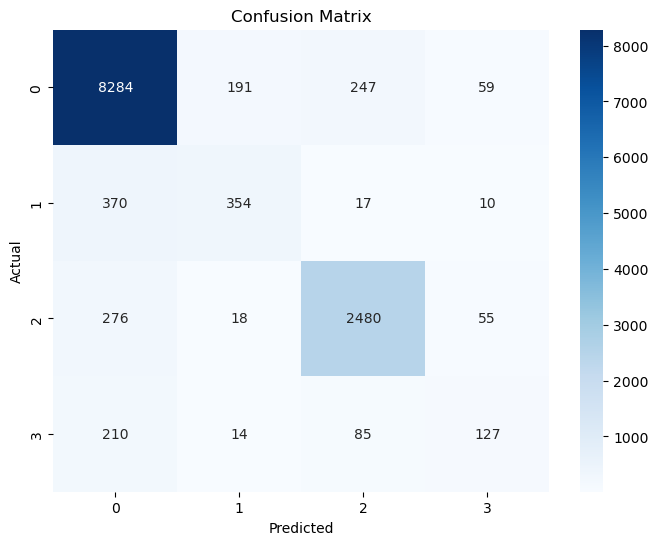

In [14]:
# ===============================
# 3. 分类任务：LDA + RandomForest
# ===============================
rf_cls = RandomForestClassifier(random_state=42)
param_grid_cls = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20],
    'min_samples_split': [2, 5]
}
grid_search_cls = GridSearchCV(rf_cls, param_grid_cls, cv=tscv, scoring='accuracy', n_jobs=-1)

grid_search_cls.fit(X_train_lda, y_train_cls)
best_model_cls = grid_search_cls.best_estimator_
y_pred_cls = best_model_cls.predict(X_test_lda)

# 分类评估
accuracy = accuracy_score(y_test_cls, y_pred_cls)
print("\nClassification Results (LDA):")
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test_cls, y_pred_cls))

# 混淆矩阵可视化
cm = confusion_matrix(y_test_cls, y_pred_cls)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()